Importing the Dependencies



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Data Collection and Processing



In [2]:
# loading dataset to a pandas Dataframe

data = pd.read_csv("C:\\Users\\AREDLA SHIVAPRASAD\\Desktop\\heart_disease_data.csv")

# print first 5rows of the dataset

data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# print last 5rows of the dataset

data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


Variable	Description

age      	Age of the patient in years

sex	        Gender of the patient (0 = Female, 1 = Male)

cp	        Chest pain type:
                           0: Typical angina
                           1: Atypical angina
                           2: Non-anginal pain
                           3: Asymptomatic
                           
trestbps	Resting blood pressure in mm Hg

chol	    Serum cholesterol in mg/dl

fbs	        Fasting blood sugar level, categorized as above 120 mg/dl (1 = true, 0 = false)
            restecg	Resting electrocardiographic results:
                                                        0: Normal
                                                        1: Having ST-T wave abnormality
                                                        2: Showing probable or definite left ventricular hypertrophy
                                                        
thalach	    Maximum heart rate achieved during a stress test
            exang Exercise-induced angina (1 = yes, 0 = no)
            oldpeak	ST depression induced by exercise relative to rest
            slope Slope of the peak exercise ST segment:
                                                       0: Upsloping
                                                       1: Flat
                                                       2: Downsloping
ca	        Number of major vessels (0-4) colored by fluoroscopy
            thal Thalium stress test result:
                                           0: Normal
                                           1: Fixed defect
                                           2: Reversible defect
                                           3: Not described
                                           
target	    Heart disease status (0 = no disease, 1 = presence of disease)

In [5]:
# shape of the dataset(rows,columns)

data.shape

(303, 14)

In [6]:
# getting some info about the data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
# checking for missing values

data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [14]:
# statistical measure of the data

data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [12]:
# how target variable is distributed

data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

0 -- Healthy Heart

1 -- Defective Heart


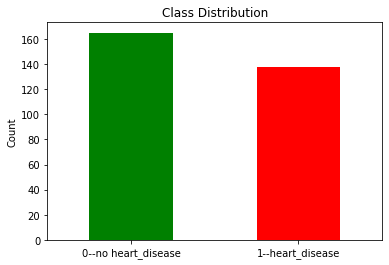

In [58]:
class_counts = data['target'].value_counts()
class_labels = ['0--no heart_disease', '1--heart_disease']
plt.figure(figsize=(6, 4))
class_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Class Distribution')
plt.xticks(ticks=[0, 1], labels=class_labels, rotation=0)
plt.ylabel('Count')
plt.show()

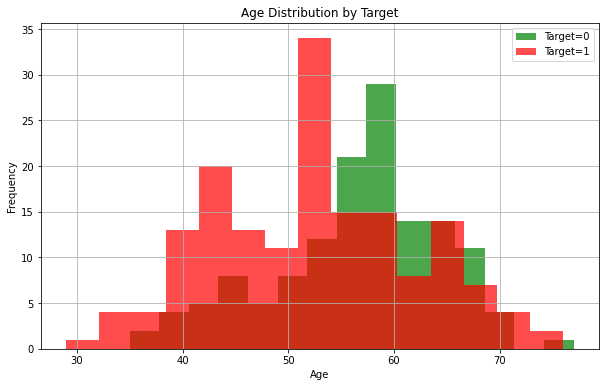

In [79]:
plt.figure(figsize=(10,6))
data[data['target']==0]['age'].hist(alpha=0.7, bins=15, label='Target=0', color='green')
data[data['target']==1]['age'].hist(alpha=0.7, bins=15, label='Target=1', color='red')
plt.title('Age Distribution by Target')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

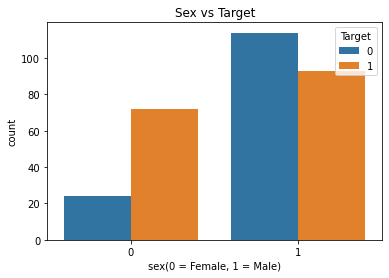

In [86]:
sns.countplot(x='sex', hue='target', data=data)
plt.title('Sex vs Target')
plt.xlabel('sex(0 = Female, 1 = Male)')
plt.ylabel('count')
plt.legend(title='Target',loc='upper right')
plt.show()

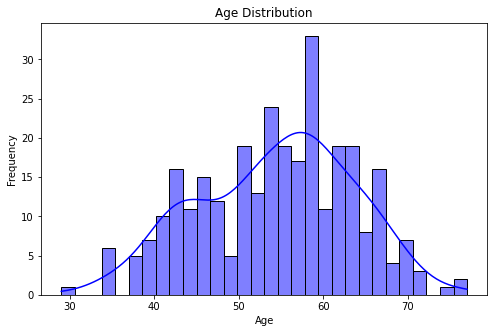

In [87]:
# Histogram for Age
plt.figure(figsize=(8, 5))
sns.histplot(data['age'], bins=30, kde=True, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

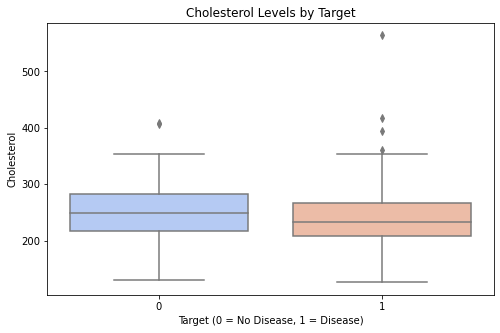

In [88]:
# Boxplot for Cholesterol by Target
plt.figure(figsize=(8, 5))
sns.boxplot(x='target', y='chol', data=data, palette='coolwarm')
plt.title('Cholesterol Levels by Target')
plt.xlabel('Target (0 = No Disease, 1 = Disease)')
plt.ylabel('Cholesterol')
plt.show()

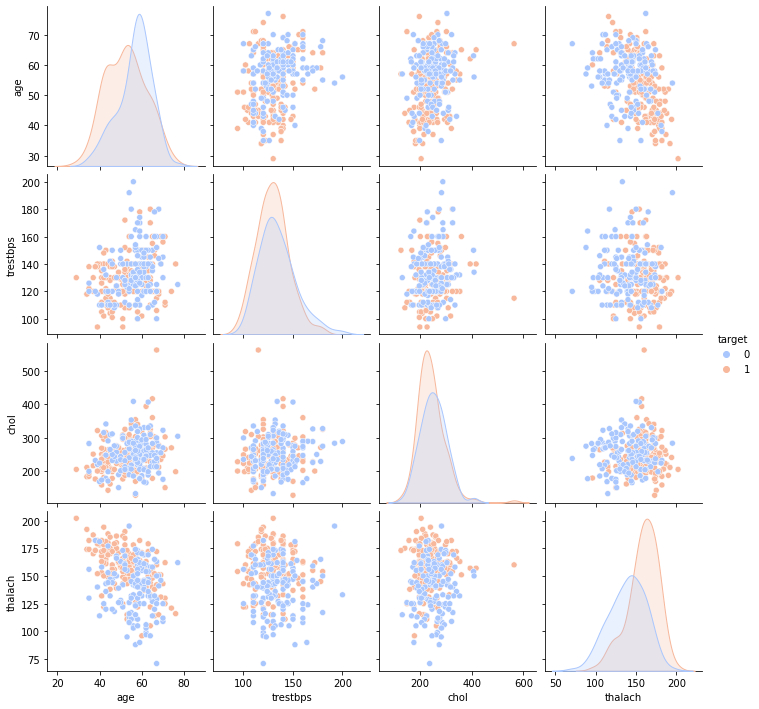

In [89]:
# Pairplot for selected features
selected_features = ['age', 'trestbps', 'chol', 'thalach', 'target']  # Update based on your dataset
sns.pairplot(data[selected_features], hue='target', palette='coolwarm')
plt.show()

Splitting features and target



In [18]:
x = data.drop(columns = 'target', axis = 1)
y = data['target']

In [20]:
print(x)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [21]:
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64




Splitting data into training data and test data



In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=2)

In [23]:
print(x.shape, x_train.shape, x_test.shape)

(303, 13) (242, 13) (61, 13)


Model Training

Logistic Regression

In [24]:
model = LogisticRegression()

In [31]:
# train the Logistic Regression model with training data

model.fit(x_train, y_train)

C:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Model Evaluation

Accuracy score

In [26]:
# Accuracy Score on training data

x_train_prediction = model.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction, y_train)

In [28]:
print('training_data_accuracy:',training_data_accuracy)

training_data_accuracy: 0.8512396694214877


In [29]:
# Accuracy Score on test data

x_test_prediction = model.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)

In [30]:
print('test_data_accuracy:',test_data_accuracy)

test_data_accuracy: 0.819672131147541


Random Forest Classifier

In [45]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=20)
random_forest.fit(x_train,y_train)

RandomForestClassifier(n_estimators=20)

In [46]:
x_train_prediction_r = model.predict(x_train)
training_data_accuracy1 = accuracy_score(x_train_prediction_r,y_train)
print('training_data_accuracy:',training_data_accuracy1)

training_data_accuracy: 0.8512396694214877


In [47]:
x_test_prediction_r = model.predict(x_test)
test_data_accuracy1 = accuracy_score(x_test_prediction_r,y_test)
print('test_data_accuracy:',test_data_accuracy1)

test_data_accuracy: 0.819672131147541


Building a Predictive System

In [40]:
input_data = (70,1,0,145,174,0,1,125,1,2.6,0,0,3)

# change the data into numpy array

input_data_as_numpy_array = np.asarray(input_data)

# reshaping the numpy array as we are predicting one data point

input_data_reshape = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshape)
print(prediction)

if (prediction[0]==0):
    print('The person does not have Heart Disease')
else:
    print('The person has Heart Disease')

[0]
The person does not have Heart Disease
